# Tugas

Dataset Shape: (1338, 7)

Statistical Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Features setelah encoding:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Train set size: 1070 samples
Test set size: 268 samples

MODEL EVALUATION METRICS

TRAINING SET:
R-squared (R²): 0.7417
Mean Squared Error (MSE): $37,27

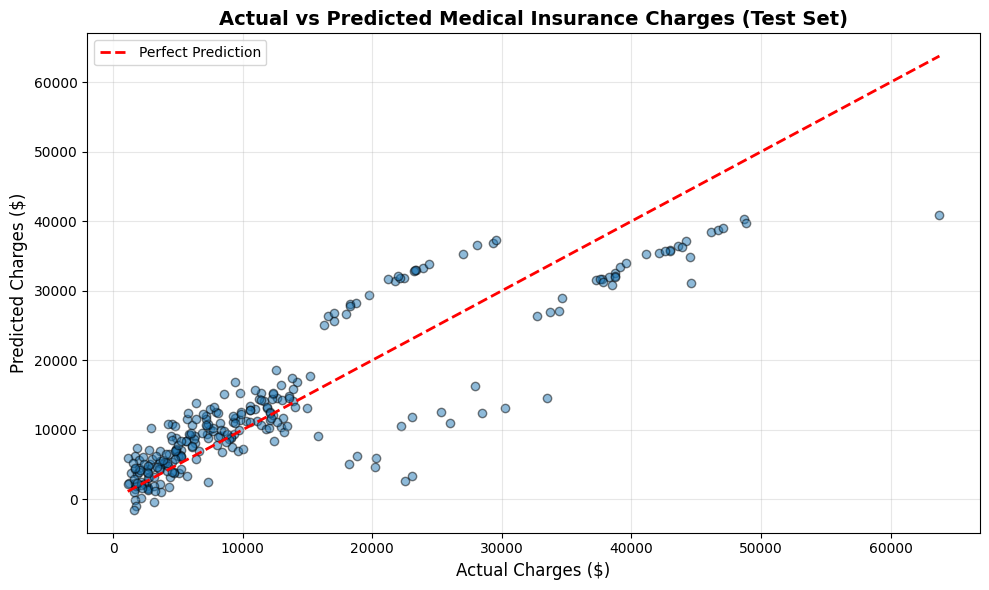

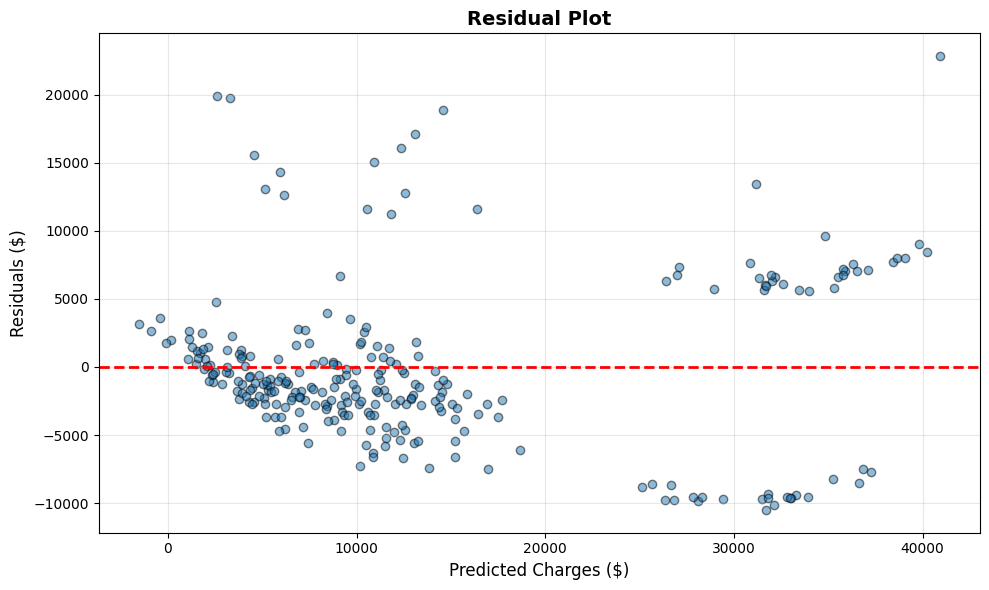

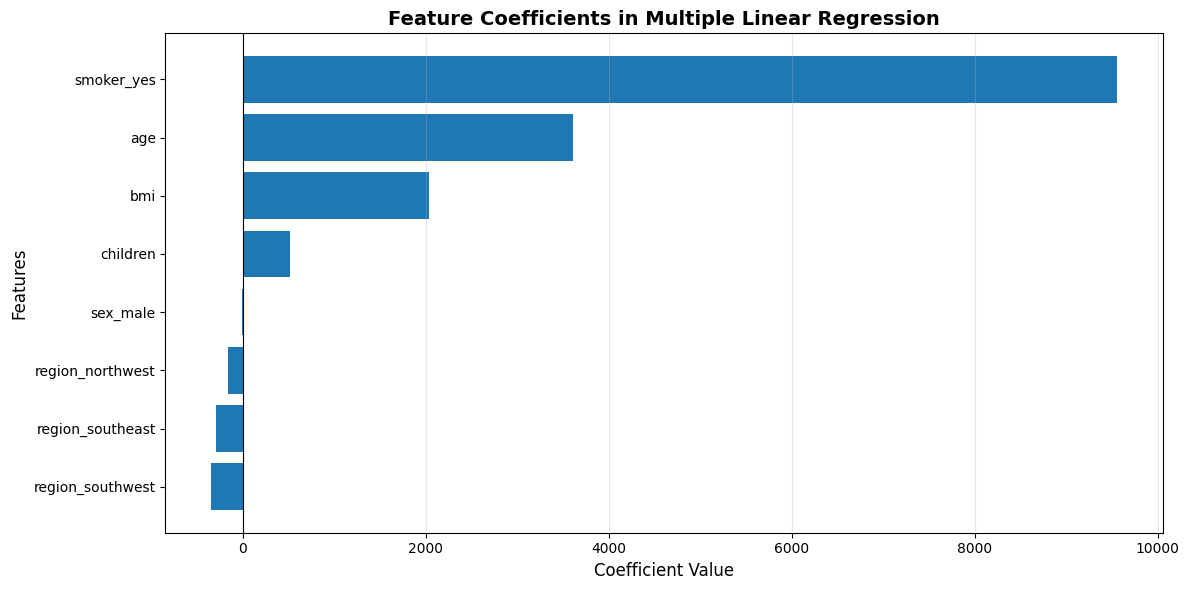

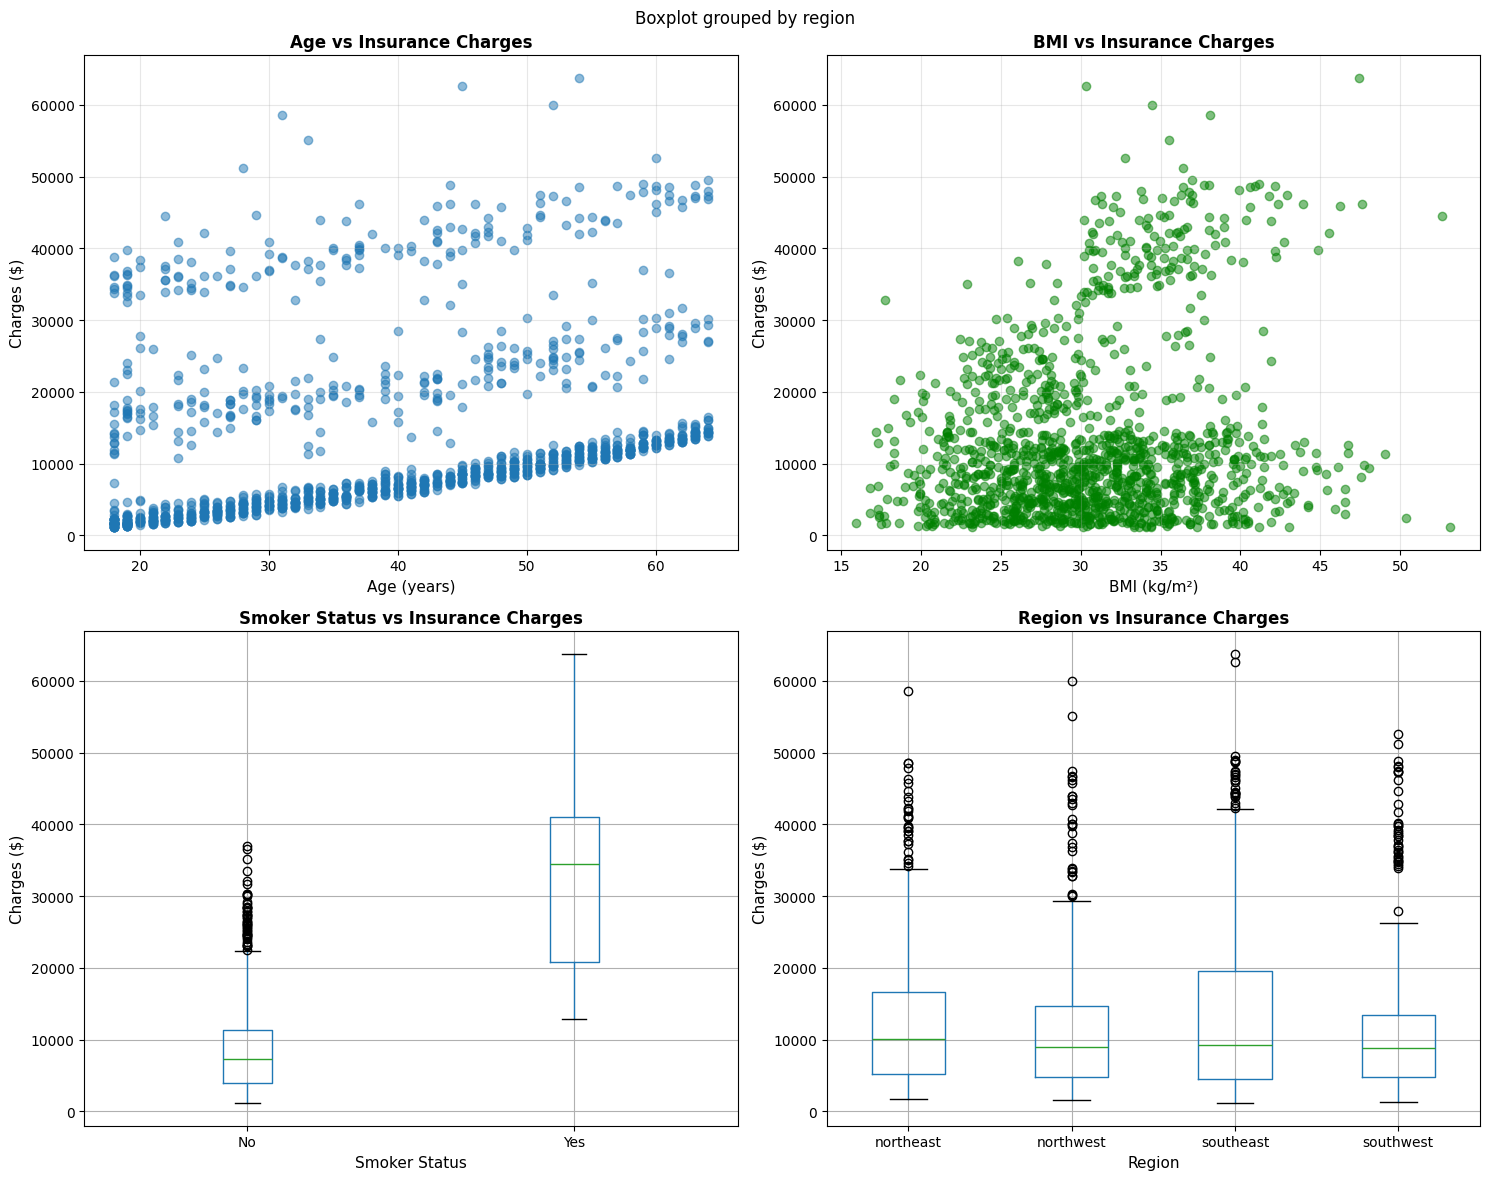

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load Dataset
df = pd.read_csv('insurance.csv')

# 2. Exploratory Data Analysis
print("Dataset Shape:", df.shape)
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Data Preprocessing - Encoding Categorical Variables
# Menggunakan One-Hot Encoding untuk variabel kategorikal
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 4. Memisahkan Features (X) dan Target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

print("\nFeatures setelah encoding:")
print(X.columns.tolist())

# 5. Split Data menjadi Train dan Test (80:20)
# Proporsi 80:20 adalah standar yang direkomendasikan dalam literatur
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# 6. Feature Scaling
# Scaling diperlukan untuk variabel dengan skala berbeda (age, bmi, children)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Build Multiple Linear Regression Model
model = LinearRegression()

# 8. Train Model
model.fit(X_train_scaled, y_train)

# 9. Make Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# 10. Model Evaluation
print("\n" + "="*80)
print("MODEL EVALUATION METRICS")
print("="*80)

# Training Set Performance
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("\nTRAINING SET:")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Squared Error (MSE): ${mse_train:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae_train:,.2f}")

# Test Set Performance
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nTEST SET:")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Squared Error (MSE): ${mse_test:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae_test:,.2f}")

# 11. Coefficients Analysis
print("\n" + "="*80)
print("MODEL COEFFICIENTS")
print("="*80)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients)
print(f"\nIntercept: ${model.intercept_:,.2f}")

# 12. Visualizations

# Visualization 1: Actual vs Predicted (Test Set)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.title('Actual vs Predicted Medical Insurance Charges (Test Set)',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved: actual_vs_predicted.png")

# Visualization 2: Residuals Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Charges ($)', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residuals_plot.png', dpi=300, bbox_inches='tight')
print("Visualization saved: residuals_plot.png")

# Visualization 3: Feature Importance (Coefficients)
plt.figure(figsize=(12, 6))
coefficients_sorted = coefficients.sort_values('Coefficient')
plt.barh(coefficients_sorted['Feature'], coefficients_sorted['Coefficient'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Coefficients in Multiple Linear Regression',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_coefficients.png', dpi=300, bbox_inches='tight')
print("Visualization saved: feature_coefficients.png")

# Visualization 4: Distribution of Charges by Key Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age vs Charges
axes[0, 0].scatter(df['age'], df['charges'], alpha=0.5)
axes[0, 0].set_xlabel('Age (years)', fontsize=11)
axes[0, 0].set_ylabel('Charges ($)', fontsize=11)
axes[0, 0].set_title('Age vs Insurance Charges', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# BMI vs Charges
axes[0, 1].scatter(df['bmi'], df['charges'], alpha=0.5, color='green')
axes[0, 1].set_xlabel('BMI (kg/m²)', fontsize=11)
axes[0, 1].set_ylabel('Charges ($)', fontsize=11)
axes[0, 1].set_title('BMI vs Insurance Charges', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Smoker vs Charges
df.boxplot(column='charges', by='smoker', ax=axes[1, 0])
axes[1, 0].set_xlabel('Smoker Status', fontsize=11)
axes[1, 0].set_ylabel('Charges ($)', fontsize=11)
axes[1, 0].set_title('Smoker Status vs Insurance Charges', fontsize=12, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['No', 'Yes'])

# Region vs Charges
df.boxplot(column='charges', by='region', ax=axes[1, 1])
axes[1, 1].set_xlabel('Region', fontsize=11)
axes[1, 1].set_ylabel('Charges ($)', fontsize=11)
axes[1, 1].set_title('Region vs Insurance Charges', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('exploratory_analysis.png', dpi=300, bbox_inches='tight')
print("Visualization saved: exploratory_analysis.png")

# 13. Summary Report
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)
print(f"""
Model: Multiple Linear Regression
Dataset: Medical Insurance Cost Dataset
Total Samples: {len(df)}
Training Samples: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)
Test Samples: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)

Features Used: {len(X.columns)}
Target Variable: charges (medical insurance costs)

Performance Metrics:
- R² Score: {r2_test:.4f} ({r2_test*100:.2f}% variance explained)
- RMSE: ${rmse_test:,.2f}
- MAE: ${mae_test:,.2f}

Model Interpretation:
The R² score indicates that the model explains approximately {r2_test*100:.1f}% of the
variance in medical insurance costs. The RMSE of ${rmse_test:,.2f} suggests the average
prediction error magnitude.
""")